# HABERMAN CANCER SURVIVAL DATASET

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
haberman = pd.read_csv("D:\Haberman_dataset\haberman.csv")

In [4]:
haberman.shape

(306, 4)

In [5]:
haberman.columns

Index(['age', 'patient's year of operation', 'axillary nodes',
       'survival status'],
      dtype='object')

In [6]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          306 non-null    int64
 1   patient's year of operation  306 non-null    int64
 2   axillary nodes               306 non-null    int64
 3   survival status              306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


## OBSERVATION
1. There are no missing values in this data set.
2. All the columns are of the integer data type.

In [7]:
haberman["survival status"].value_counts()

1    225
2     81
Name: survival status, dtype: int64

## OBSERVATION

1. There are 81 people who didnot survive are there are 225 people who survived
2. This is an imbalanced dataset

In [8]:
haberman.describe()

,age,patient's year of operation,axillary nodes,survival status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## 2d Scatter Plot

In [9]:
## Checking which age group has higher axillary nodes

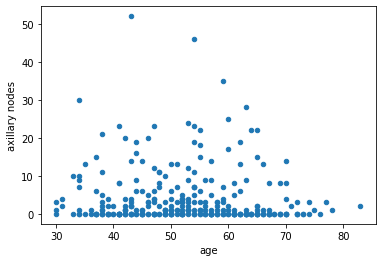

In [10]:
haberman.plot(kind= "scatter",x = "age",y= "axillary nodes")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


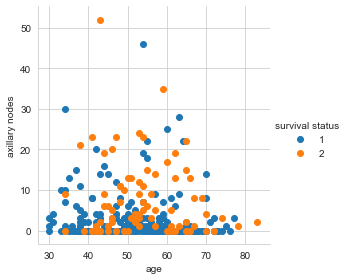

In [11]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue = "survival status",size =4)\
    .map(plt.scatter, "age" , "axillary nodes")\
    .add_legend();
plt.show()

### OBSERVATION
It is very Difficult to find any Conclusion from the above graph because many features overlapse with each other

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


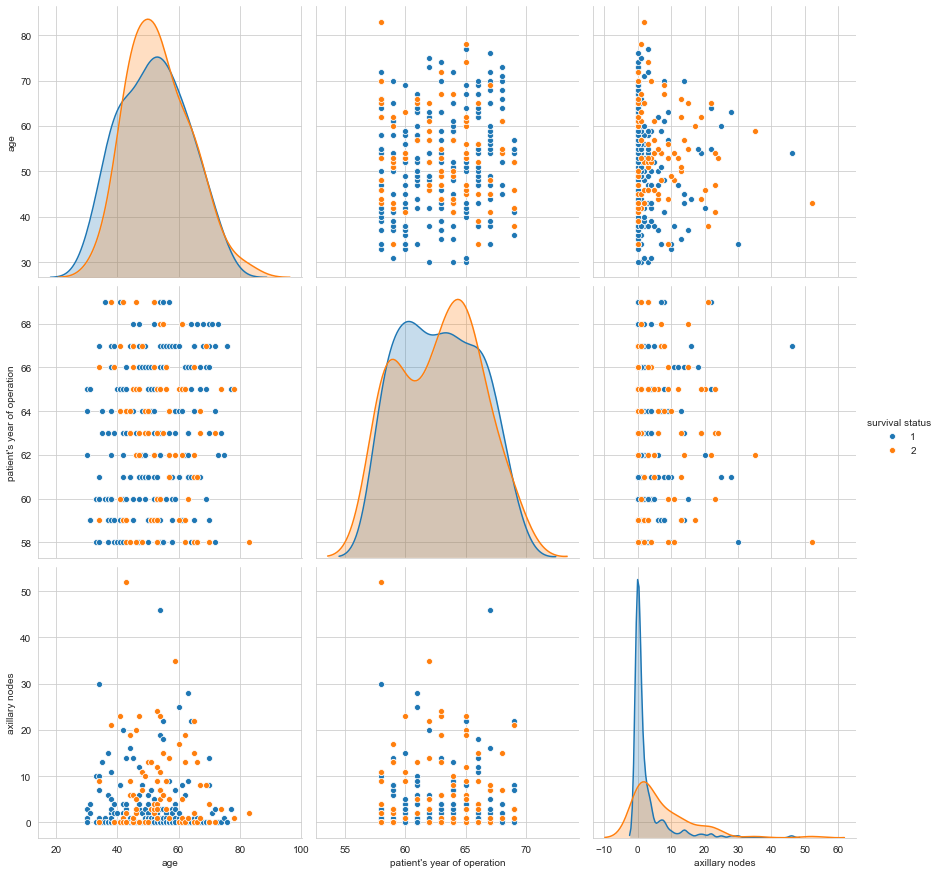

In [12]:
sns.set_style("whitegrid")
sns.pairplot(haberman,hue = "survival status",size =4)
plt.show()

## OBSERVATION 
 
We are unable to classify which is the most useful feature because of too much overlapping. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


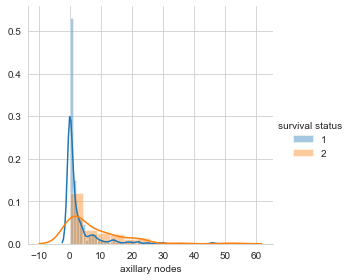

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


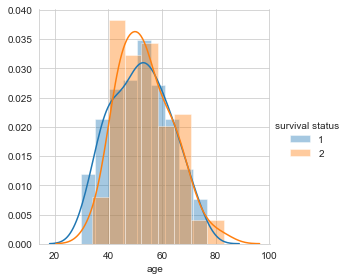

In [13]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue = "survival status",size =4)\
    .map(sns.distplot, "axillary nodes")\
    .add_legend();
plt.show()

sns.FacetGrid(haberman,hue = "survival status",size =4)\
    .map(sns.distplot, "age")\
    .add_legend();
plt.show()


## OBSERVATION
We find that axillary nodes are the best way out of the given features to determine a patient will survive or not

If the patient has 0 to 2 or 3 axillary nodes the chances of survival are high

In [14]:
survived = haberman.loc[haberman["survival status"]==1]
didnot_survived = haberman.loc[haberman["survival status"]==2]

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


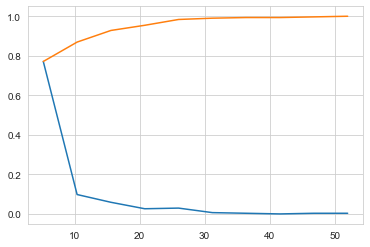

In [16]:
counts,bin_edges = np.histogram(haberman['axillary nodes'], bins=10,density = True)
pdf = counts/sum(counts)

print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)